In [1]:
import os
os.chdir('yolov5')

In [2]:
!pip install torch
import cv2

from pathlib import Path
import logging

In [3]:
# Check if torch is installed
try:
    import torch
except ModuleNotFoundError:
    print("Installing torch...")
    !pip install torch torchvision

### Adding the detector yolov5 and image to be detected

Using cache found in C:\Users\Hello/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2024-10-12 Python-3.12.7 torch-2.4.1+cpu CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
C:\Users\Hello/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


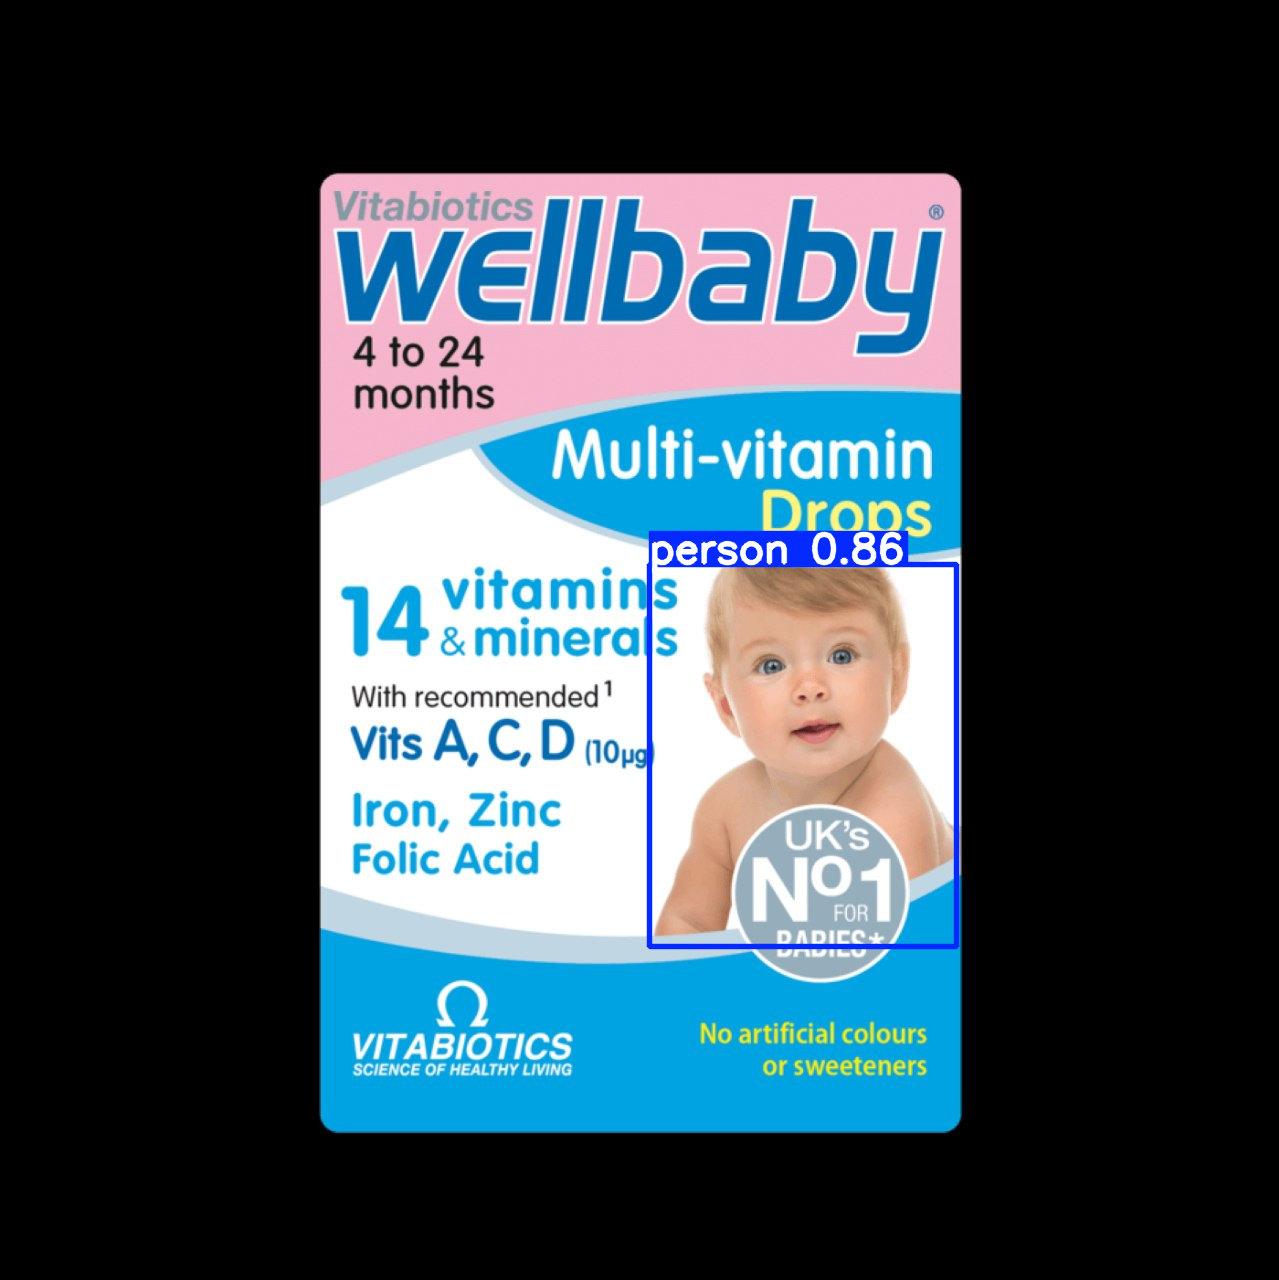

In [4]:
from PIL import Image
import torch

# Load YOLO model
model = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True)

# Set image path (absolute path)
image_path = '../images/@lobelia4cosmetics_11405.jpg'

# Perform object detection
results = model(image_path)

# Display the image with bounding boxes
results.show()

In [5]:
# Process the detection results
for detection in results.pandas().xyxy[0].iterrows():
    _, data = detection
    xmin, ymin, xmax, ymax = data[['xmin', 'ymin', 'xmax', 'ymax']]
    confidence = data['confidence']
    class_label = data['name']

    # Store the detection data to a database table

    # Print the detection results
    print(f"Object: {class_label}, Confidence: {confidence:.2f}, Bounding Box: ({xmin:.2f}, {ymin:.2f}, {xmax:.2f}, {ymax:.2f})")

Object: person, Confidence: 0.86, Bounding Box: (649.88, 564.33, 956.76, 946.79)
